READ INPUT FILES...
     -> READ MESH DATA FILES...Done!
     -> READ FIX DATA FILE...     -> READ EQUILI DATA FILE...Done!
Done!
INITIALIZATION...
     -> INITIALISE LEVEL-SET...Done!
     -> INITIALISE ELEMENTS...Done!
     -> CLASSIFY ELEMENTS...Done!
     -> APPROXIMATE VACUUM VESSEL FIRST WALL...Done!
     -> APPROXIMATE PLASMA/VACUUM INTERFACE...Done!
     -> COMPUTE NUMERICAL INTEGRATION QUADRATURES...Done!
     -> INITIALISE UNKNOWN VECTORS AND COMPUTE INITIAL GUESS...
         -> COMPUTE INITIAL GUESS FOR PSI_NORM...Done!
         -> COMPUTE INITIAL VACUUM VESSEL FIRST WALL VALUES PSI_B...Done!
     Done!
Done!


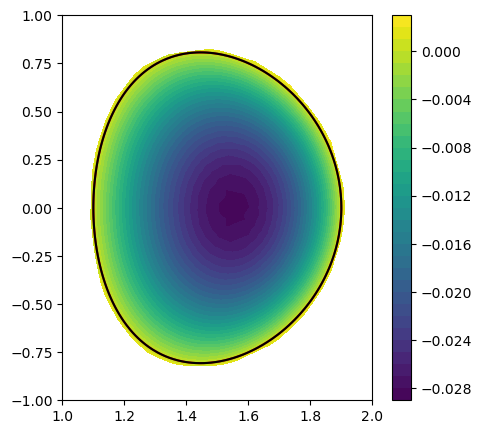

START ITERATION...
OUTER ITERATION = 1 , INNER ITERATION = 1
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...LOCAL EXTREMUM NOT FOUND. TAKING PREVIOUS SOLUTION
LOCAL EXTREMUM AT  [0. 0.]  (ELEMENT  0 ) WITH VALUE PSI_0 =  [1.02491977e-05]


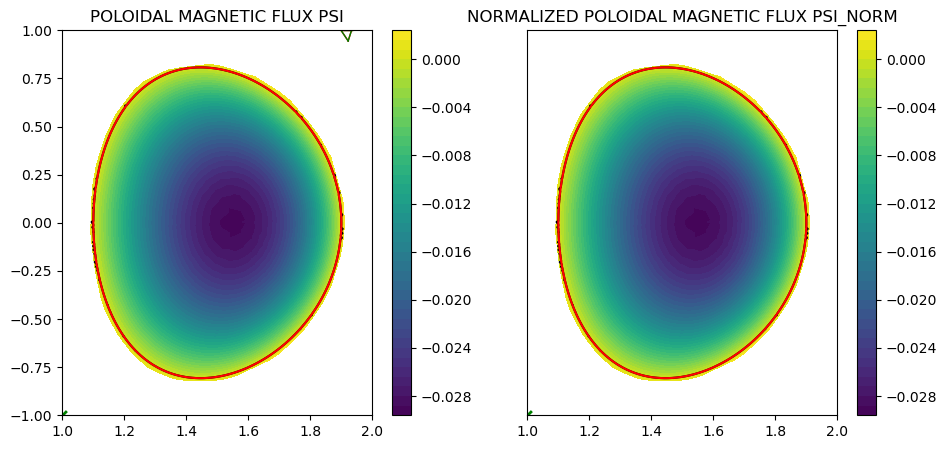

Internal iteration =  1 , PSI_NORM residu =  1.6564439738951484
 
OUTER ITERATION = 1 , INNER ITERATION = 2
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...LOCAL EXTREMUM NOT FOUND. TAKING PREVIOUS SOLUTION
LOCAL EXTREMUM AT  [0. 0.]  (ELEMENT  0 ) WITH VALUE PSI_0 =  [1.02491977e-05]


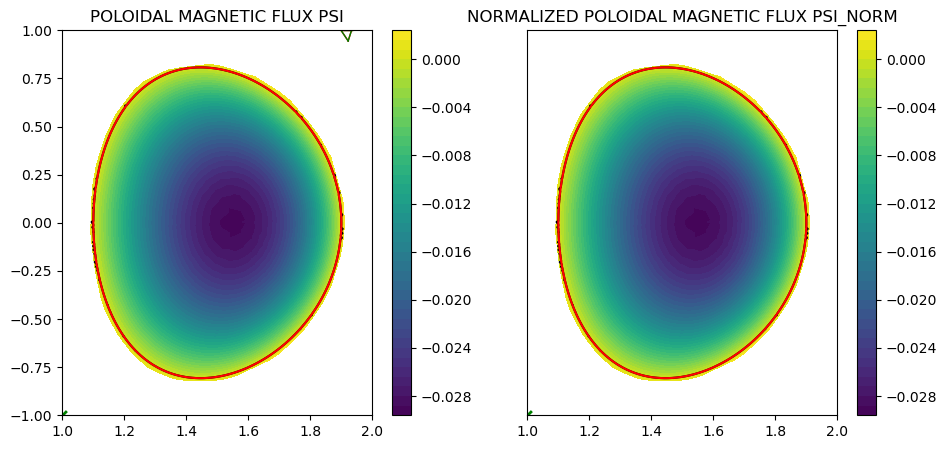

Internal iteration =  2 , PSI_NORM residu =  0.0
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...Done!
External iteration =  1 , PSI_B residu =  0.0
 
SOLUTION CONVERGED


In [1]:
import sys
sys.path.append('/home/elmanyer/Documents/BSC/MasterThesis/Code/EQUILI_PY/')

from src.GradShafranovCutFEM import *

### LOCATION OF FOLDERS
folder_MESHES = '/home/elmanyer/Documents/BSC/MasterThesis/Code/EQUILI_PY/MESHES/'   # MESHES
folder_CASES = '/home/elmanyer/Documents/BSC/MasterThesis/Code/EQUILI_PY/CASES/'     # CASES

### SELECT MESH FOLDER...
mesh="TS-CUTFEM-TRI03-LIN"

# ... WITH MESH ELEMENTS:
ElementType = 1     # Element type -> 1: TRIANGLE  ; 2: QUADRILATERAL
ElementOrder = 1    # Element order -> 1: LINEAR  ; 2: QUADRATIC ; 3: CUBIC ...

### SELECT SOLUTION CASE FILE:
CASE = 'TS-FIXED-OMEGON-LINEAR'

##############################################################

# DECLARE OBJECT PROBLEM 
Problem = GradShafranovCutFEM(folder_MESHES+mesh,folder_CASES+CASE,ElementType,ElementOrder)

Problem.EQUILI()

In [2]:
# READ results file
FixDataFile = Problem.mesh_folder +'/'+ 'TS-CUTFEM-TRI03-LIN.ensi.FLUXP-000001'
file = open(FixDataFile, 'r') 
psisol = np.zeros([Problem.Nn],dtype=float)
linenum=0
for line in file:
    l = line.split(' ')
    l = [m for m in l if m != '']
    for e, el in enumerate(l):
        if el == '\n':
            l.remove('\n') 
        elif el[-1:]=='\n':
            l[e]=el[:-1]
    linenum += 1
    if linenum > 4:
        psisol[linenum-5] = float(l[0])
    

0.008556363455948226


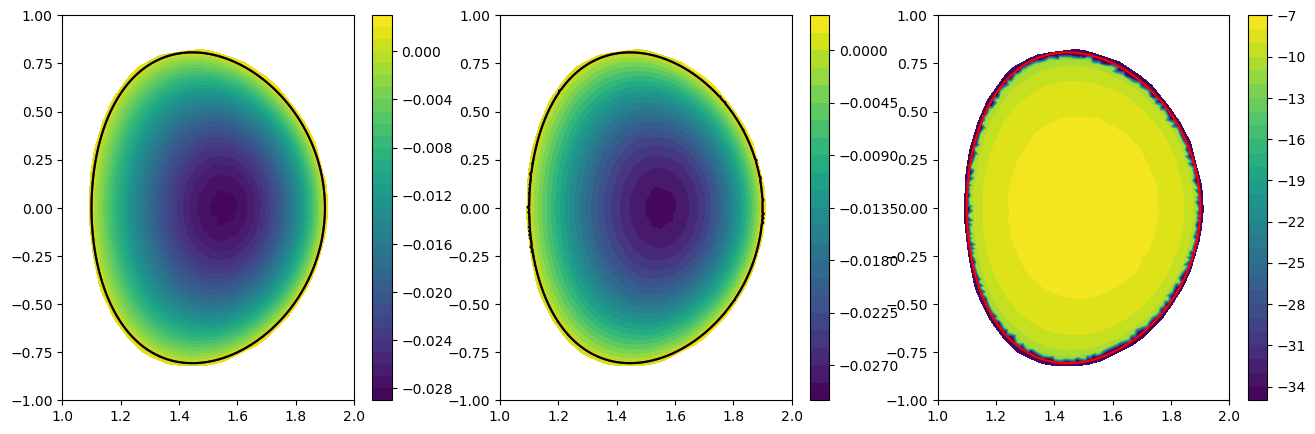

In [5]:
Problem.PlotError()

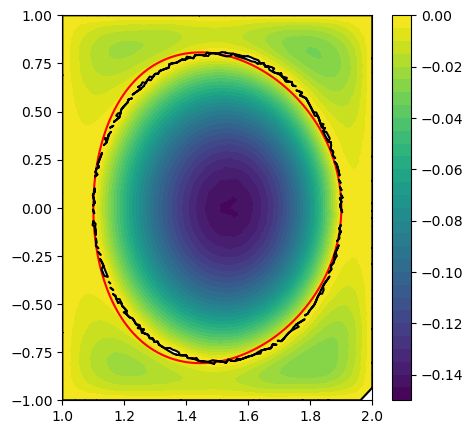

In [4]:
fig, axs = plt.subplots(1, 1, figsize=(5,5))
a = axs.tricontourf(Problem.X[:,0],Problem.X[:,1], psisol, levels=30)
axs.tricontour(Problem.X[:,0],Problem.X[:,1], Problem.PlasmaBoundLevSet, levels=[0], colors = 'red')
axs.tricontour(Problem.X[:,0],Problem.X[:,1], psisol, levels=[0], colors = 'black')
plt.colorbar(a, ax=axs)
plt.show()
